# HW2 - Elijah Williams

**Installing dependencies**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Question 1

**a) Logistic activation function**

First we will implement the logistic (sigmoid) activation function using a `for` loop and `vectorized` operations. 

Logistic function:

$ a(n) = \dfrac{1}{1 + exp(-n)} = \dfrac{1}{(1 + e^{-n})} $

In [2]:
# For loop logistic function

def logistic_for_loop(n):
    """Takes a list of numbers, returns their activations"""
    a = np.zeros(len(n)) # creating array of zeroes of length of input array

    for i in range(len(n)):
        a[i] = 1 / (1 + np.exp((-1)*n[i]))

    return a

In [3]:
# Vectorized logistic function

def logistic_vectorized(n):
    """Takes a list of numbers, returns their activations"""
    a = 1 / (1 + np.exp((-1)*n))
    return a

In [4]:
# Testing out these two functions
n = np.linspace(-100, 100, 10)
a1 = logistic_for_loop(n)
a2 = logistic_vectorized(n)
print(a1,a2)

[3.72007598e-44 1.66548335e-34 7.45639288e-25 3.33823780e-15
 1.49451152e-05 9.99985055e-01 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00] [3.72007598e-44 1.66548335e-34 7.45639288e-25 3.33823780e-15
 1.49451152e-05 9.99985055e-01 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00]


**b) relu activation function**

Now we will implement a relu (rectified linear unit) function using both a `for` loop and `vectorized` operations

$ a(n) = \begin{cases}
n           & n \geq 0           \\
0,          &\text{else}
\end{cases}
$

In [5]:
# For loop relu function

def relu_for_loop(n):
    """Returns list of relu activations for given list of net inputs"""
    a = np.zeros(len(n))

    for i in range(len(n)):
        if n[i] >= 0:
            a[i] = n[i]
    
    return a

In [6]:
# Vectorize relu function

def relu_vectorized(n): 
    a = np.abs(n) * np.heaviside(n,n)

    return a

# note-to-self: can also use a = np.where(n>=0, n, 0.)

In [7]:
# Testing for loop and vectorized implementation
n = np.array([3,0,-4,-1,-.1, 1, .1])
x = relu_for_loop(n)
y = relu_vectorized(n)
print(x,y)
print(x == y)
        

[3.  0.  0.  0.  0.  1.  0.1] [3.  0.  0.  0.  0.  1.  0.1]
[ True  True  True  True  True  True  True]


**c) plotting function**

Here we visualize the two activation functions and create a plotting function using `matplotlib.pyplot`, labeling each figure fully

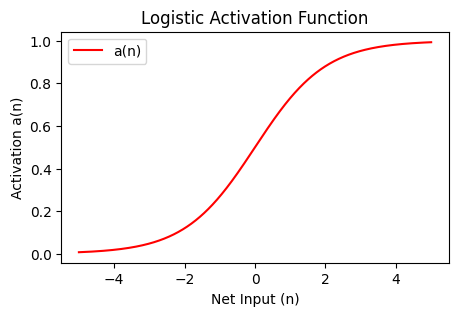

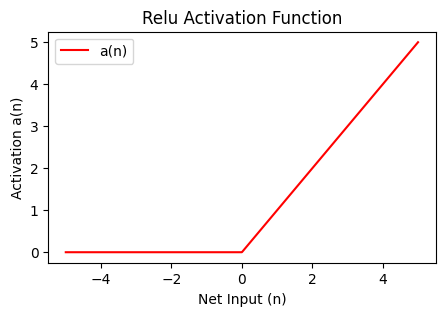

In [8]:
n = np.linspace(-5,5,1000) # getting range of values for n

def my_plotter(n, a1, l1, title, single, a2=None, a3=None, l2=None, l3=None):
    # arguments: n is an array of net input values 
    # a1, a2, a3 are arrays of activation values
    # l1, l2, l3 are formatted strings for the legend
    # title is the figure title
    plt.figure(figsize=(5,3))
    plt.plot(n, a1, 'r-', label=l1)

    if not single: #if there are multiple graphs
        plt.plot(n, a2, 'g-', label=l2)
        plt.plot(n, a3, 'b-', label=l3)

    plt.xlabel('Net Input (n)')
    plt.ylabel('Activation a(n)')
    plt.title(title)
    plt.legend()
    plt.show()

my_plotter(n, logistic_for_loop(n), l1="a(n)", title="Logistic Activation Function", single=True)
my_plotter(n, relu_for_loop(n),l1="a(n)", title="Relu Activation Function",single=True)


## Question 2
Making a tiny neural network (1 weight, 1 bias)

In [9]:
def nn_tiny(x, w, b):
    """
    Simple neural network which retuns wx + b

    Parameters:
        x:
          Array of input values
        w:
          weight value
        b:
          bias value
    """

    n = np.add(np.multiply(w,x), b)

    return n


In [10]:
# Testing
nn_tiny([3,5,-2], 4,-1) # should return (11, 19, -9)

array([11, 19, -9])

**Logistic Function**

First, we will create a plot that displays the logistic activation function with three different weights (-1,0,1) all on the same graph using `my_plotter` function

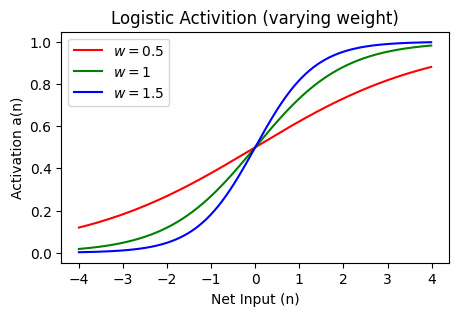

In [11]:
x = np.arange(-4,4,.01) # range of values and increments
weights = (.5,1, 1.5) # weights 

w1 = logistic_for_loop(nn_tiny(x, weights[0], 0))
w2 = logistic_for_loop(nn_tiny(x, weights[1], 0))
w3 = logistic_for_loop(nn_tiny(x, weights[2], 0))

#my_plotter(n, a1, l1, title, single, a2=None, a3=None, l2=None, l3=None):
my_plotter(x, w1, f"$w = {weights[0]}$", "Logistic Activition (varying weight)", False, w2, w3, f"$w = {weights[1]}$", f"$w = {weights[2]}$" )


Similarly, we will create a plot that displays logistic activation function with three different biases

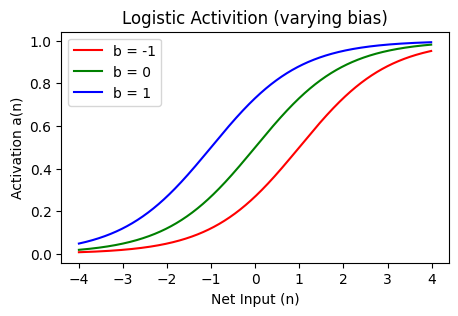

In [12]:
x = np.arange(-4,4,.01) # range of values and increments
bias = (-1,0, 1) # weights 

b1 = logistic_for_loop(nn_tiny(x, 1, bias[0]))
b2 = logistic_for_loop(nn_tiny(x, 1, bias[1]))
b3 = logistic_for_loop(nn_tiny(x, 1, bias[2]))

# my_plotter(n, a1, l1, title, single, a2=None, a3=None, l2=None, l3=None):
my_plotter(x, b1, f"b = {bias[0]}", "Logistic Activition (varying bias)", False, b2, b3, f"b = {bias[1]}", f"b = {bias[2]}" )

**relu (varying weights and biases)**

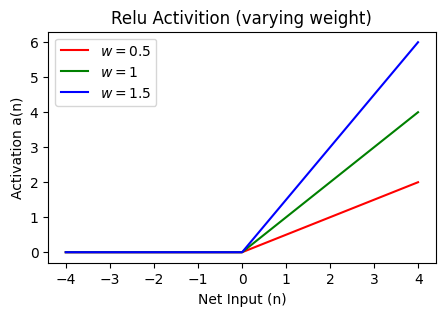

In [13]:
# Varying the weights of relu function

x = np.arange(-4,4,.01) # range of values and increments
weights = (.5,1, 1.5) # weights 

w1 = relu_for_loop(nn_tiny(x, weights[0], 0))
w2 = relu_for_loop(nn_tiny(x, weights[1], 0))
w3 = relu_for_loop(nn_tiny(x, weights[2], 0))

#my_plotter(n, a1, l1, title, single, a2=None, a3=None, l2=None, l3=None):
my_plotter(x, w1, f"$w = {weights[0]}$", "Relu Activition (varying weight)", False, w2, w3, f"$w = {weights[1]}$", f"$w = {weights[2]}$" )

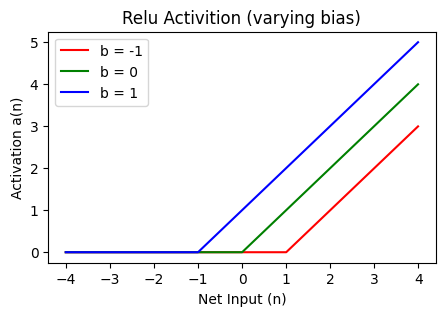

In [14]:
# Varying the biases of relu activation
x = np.arange(-4,4,.01) # range of values and increments
bias = (-1,0, 1) # weights 

b1 = relu_for_loop(nn_tiny(x, 1, bias[0]))
b2 = relu_for_loop(nn_tiny(x, 1, bias[1]))
b3 = relu_for_loop(nn_tiny(x, 1, bias[2]))

# my_plotter(n, a1, l1, title, single, a2=None, a3=None, l2=None, l3=None):
my_plotter(x, b1, f"b = {bias[0]}", "Relu Activition (varying bias)", False, b2, b3, f"b = {bias[1]}", f"b = {bias[2]}" )

## Conclusion
We will be working with simplified models of neurons throughout this course, and the logistic and relu functions
are often used to model a neuron's activation, given a certain value of incoming input. 
A key point is that a neuron's response is nonlinear. Low amounts of input do not affect a neuron's activity much,
but as net input increases, there is a point when a small change in net input has a large effect on neuron's acrivation.
For logistic function,at some point, the neuron saturates, it is as active as its going to get, and small increase in net input
do not have much of an effect.